### Handwritten Digit Recognition Using CNN

Handwritten digit recognition is a fundamental problem in computer vision, with applications in automated form processing, banking systems, postal services, and digitized document analysis. Traditional machine learning models struggle with raw image data due to the high dimensionality and complexity of visual patterns.

In this project, we aim to develop a Convolutional Neural Network (CNN)-based model to classify handwritten digits using the MNIST dataset. The dataset consists of grayscale images of digits (0-9), each 28×28 pixels in size. Since the images are pre-aligned and contain only a single digit per image, CNNs can effectively learn spatial hierarchies of features, making them well-suited for this task.

The objective is to train a CNN model to accurately recognize and classify handwritten digits with high accuracy. This model will be evaluated on test images to assess its generalization performance.

In [5]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense 

In [ ]:
# load the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape # 60,000 images of size 28x28 (grayscale)

(60000, 28, 28)

In [12]:
# Reshape the data
# CNNs expect images in the format: (batch_size, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test =  X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

The images have a channel dimension (1 for grayscale), making them compatible with CNNs!

In [13]:
# Normalize the pixel value
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [15]:
print(f"Y train: {y_train}")
print(f"Y test: {y_test}")

Y train: [5 0 4 ... 5 6 8]
Y test: [7 2 1 ... 4 5 6]


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))

model = Sequential()
- Creates a sequential model where layers are stacked in order.
- This means each layer’s output becomes the input for the next layer.

Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))
- 32 -> Number of filters (kernels) in the layer. Each filter detects different features (edges, shapes, textures).
- (3,3) -> Size of each filter (3×3 pixels). This means the filter scans 3×3 pixel sections of the image.
- activation='relu' - Uses ReLU (Rectified Linear Unit) to introduce non-linearity, keeping only positive values.
- input_shape=(28,28,1) - Defines the input image dimensions: 28×28 pixels, 1 channel (grayscale).

In [17]:
# Apply max pooling
model.add(MaxPool2D(2,2))

In [18]:
# Add fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))

In [19]:
# Adding output layer
model.add(Dense(10, activation='softmax'))

In [20]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fitting the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
   1/1875 [..............................] - ETA: 1:54 - loss: 3.2264e-05 - accuracy: 1.0000

2025-02-21 21:29:37.915682: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

2025-02-21 21:31:20.456910: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 107s 57ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0591 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0575 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0600 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0603 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0653 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0593 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0671 - val

**Conclusion**
- Accuracy improves steadily, reaching 99.80% by epoch 10.
- Loss decreases, meaning the model is making fewer mistakes.

In [29]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

2025-02-21 21:53:23.160125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 4s 14ms/step - loss: 0.0834 - accuracy: 0.9854
Test accuracy: 0.9854


Epoch 1/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0842 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0782 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0873 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0799 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0814 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0947 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0824 -

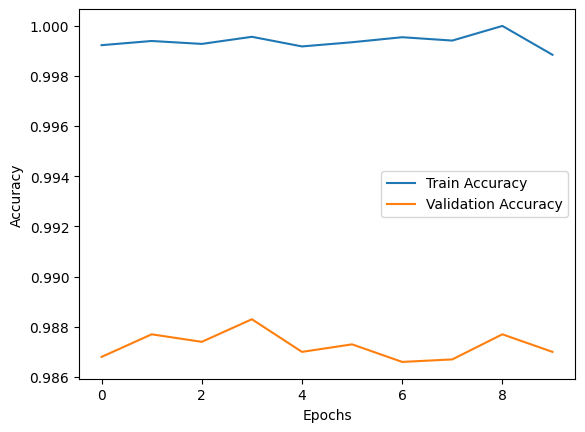

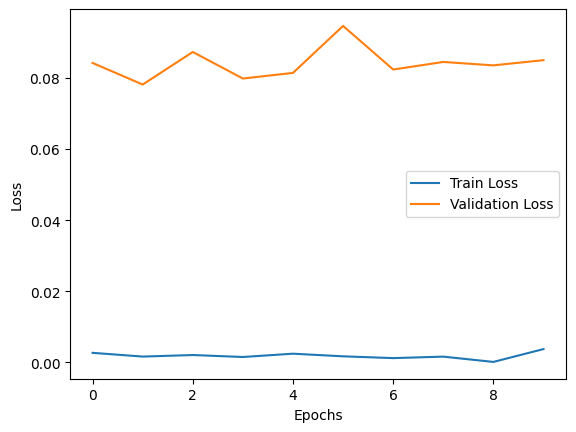

In [31]:
import matplotlib.pyplot as plt

# Ensure model is trained first
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Check available keys
print(history.history.keys())  # Ensure 'accuracy' exists

# Plot Accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
else:
    plt.plot(history.history['acc'], label='Train Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
